#### Basic imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime as dt

### BACKGROUND
Lithuania was one of the countries with extremely low cases and deaths during the first COVID wave. However, situation changed dramatically during the second COVID wave and [statistics turned over](https://www.lrt.lt/en/news-in-english/19/1300436/coronavirus-lithuania-worst-affected-country-in-the-world-nyt).

Goal of this project is to get insights why the situation become uncontrollable.

Hypothesis: The second quarantine was announced too late.

#### Importing data
Global COVID data could be accessed [here](https://ourworldindata.org/coronavirus-source-data)

In [2]:
global_covid = pd.read_csv("C://Users/ovidi/OneDrive/Desktop/Turing college/DS 1.2.4/covid-data.csv")

In [3]:
global_covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56268,ZWE,Africa,Zimbabwe,2020-12-21,12422.0,97.0,152.000,322.0,2.0,1.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
56269,ZWE,Africa,Zimbabwe,2020-12-22,12544.0,122.0,146.000,326.0,4.0,2.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
56270,ZWE,Africa,Zimbabwe,2020-12-23,12656.0,112.0,129.571,330.0,4.0,2.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
56271,ZWE,Africa,Zimbabwe,2020-12-24,12786.0,130.0,131.429,339.0,9.0,3.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


#### Extract Lithuanian data

In [4]:
lithuania_covid = global_covid[global_covid["location"]=="Lithuania"]

In [5]:
lithuania_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 29644 to 29946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            303 non-null    object 
 1   continent                           303 non-null    object 
 2   location                            303 non-null    object 
 3   date                                303 non-null    object 
 4   total_cases                         302 non-null    float64
 5   new_cases                           302 non-null    float64
 6   new_cases_smoothed                  297 non-null    float64
 7   total_deaths                        280 non-null    float64
 8   new_deaths                          280 non-null    float64
 9   new_deaths_smoothed                 297 non-null    float64
 10  total_cases_per_million             302 non-null    float64
 11  new_cases_per_million               302

#### Extracting relevant columns

In [6]:
relevant_cols = ["location", "date", "total_cases", "total_deaths", "new_cases", "new_deaths"]

In [7]:
lithuania_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 29644 to 29946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            303 non-null    object 
 1   continent                           303 non-null    object 
 2   location                            303 non-null    object 
 3   date                                303 non-null    object 
 4   total_cases                         302 non-null    float64
 5   new_cases                           302 non-null    float64
 6   new_cases_smoothed                  297 non-null    float64
 7   total_deaths                        280 non-null    float64
 8   new_deaths                          280 non-null    float64
 9   new_deaths_smoothed                 297 non-null    float64
 10  total_cases_per_million             302 non-null    float64
 11  new_cases_per_million               302

#### Fixing date column to datetime

In [8]:
lithuania_covid["date"] = pd.to_datetime(lithuania_covid["date"])

<ipython-input-8-9ebb19a2a284>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lithuania_covid["date"] = pd.to_datetime(lithuania_covid["date"])


In [9]:
lithuania_covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
29644,LTU,Europe,Lithuania,2020-02-23,NaN,NaN,NaN,NaN,NaN,NaN,...,29524.265,0.7,342.989,3.67,21.3,38.0,NaN,6.56,75.93,0.858
29645,LTU,Europe,Lithuania,2020-02-28,1.0,1.0,NaN,NaN,NaN,NaN,...,29524.265,0.7,342.989,3.67,21.3,38.0,NaN,6.56,75.93,0.858
29646,LTU,Europe,Lithuania,2020-02-29,1.0,0.0,NaN,NaN,NaN,NaN,...,29524.265,0.7,342.989,3.67,21.3,38.0,NaN,6.56,75.93,0.858
29647,LTU,Europe,Lithuania,2020-03-01,1.0,0.0,NaN,NaN,NaN,NaN,...,29524.265,0.7,342.989,3.67,21.3,38.0,NaN,6.56,75.93,0.858
29648,LTU,Europe,Lithuania,2020-03-02,1.0,0.0,NaN,NaN,NaN,NaN,...,29524.265,0.7,342.989,3.67,21.3,38.0,NaN,6.56,75.93,0.858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29942,LTU,Europe,Lithuania,2020-12-21,114487.0,2128.0,2780.857,1039.0,20.0,30.571,...,29524.265,0.7,342.989,3.67,21.3,38.0,NaN,6.56,75.93,0.858
29943,LTU,Europe,Lithuania,2020-12-22,116358.0,1871.0,2843.714,1093.0,54.0,32.857,...,29524.265,0.7,342.989,3.67,21.3,38.0,NaN,6.56,75.93,0.858
29944,LTU,Europe,Lithuania,2020-12-23,120094.0,3736.0,2889.286,1143.0,50.0,33.714,...,29524.265,0.7,342.989,3.67,21.3,38.0,NaN,6.56,75.93,0.858
29945,LTU,Europe,Lithuania,2020-12-24,123889.0,3795.0,2980.143,1186.0,43.0,36.143,...,29524.265,0.7,342.989,3.67,21.3,38.0,NaN,6.56,75.93,0.858


#### Ploting two lines (new_cases and new_deaths) distributed in time
Two different Y axis have its own values

Adding vertical lines which represent the start of the first and the second national quarantine

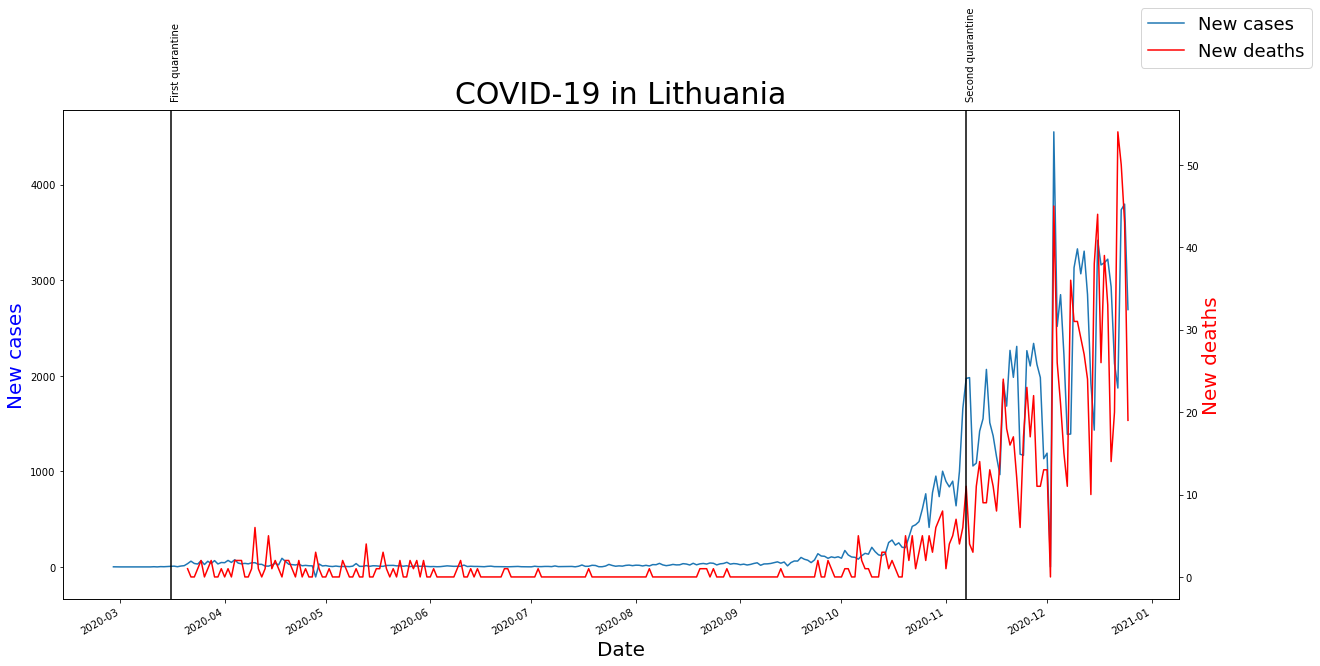

In [10]:
ax = lithuania_covid.plot(x="date", y="new_cases", legend=False)
ax2 = ax.twinx()
lithuania_covid.plot(x="date", y="new_deaths", ax=ax2, legend=False, color="r", figsize=(20,10))
ax.figure.legend(["New cases", "New deaths"], fontsize = 18);
ax.set_xlabel('Date', size=20)
ax.set_ylabel('New cases', color='b', size = 20)
ax2.set_ylabel('New deaths', color='r', size = 20)
plt.title("COVID-19 in Lithuania", size = 30)

plt.axvline(x=pd.to_datetime("2020-03-16"), color = "black")
plt.text(pd.to_datetime("2020-03-16"),58,'First quarantine',rotation=90)
plt.axvline(x=pd.to_datetime("2020-11-07"), color = "black")
plt.text(pd.to_datetime("2020-11-07"),58,'Second quarantine',rotation=90)

plt.rc('font', size=18) 
plt.rc('axes', titlesize=18)     
plt.rc('axes', labelsize=18)    
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20)    
plt.rc('legend', fontsize=12)    
plt.rc('figure', titlesize=25)

months = mdates.MonthLocator()
ax.format_xdata = mdates.DateFormatter(months)

plt.show()

#### Digging deeper
Let's compare total cases and total deaths statistics in different European countries (France, Germany, Ireland, Italy) on the start of the first and the second lockdown. Total cases and total deaths will be presented in a number per 100 000 citizens. [Lockdown dates](https://en.wikipedia.org/wiki/COVID-19_pandemic_lockdowns)

In [11]:
dictionary = {"Country":["Lithuania", 'France','Germany','Ireland','Italy'],
             "First quarantine start": ["2020-03-16","2020-03-17", "2020-03-23", "2020-03-12", "2020-03-09"],
             "Second quarantine start": ["2020-11-07","2020-10-30","2020-11-02","2020-10-21","2020-11-06"]}

In [12]:
lockdowns = pd.DataFrame(data=dictionary)

#### Extracting population size

In [17]:
pop_arr = []
for i in range(5):
    pop = global_covid[global_covid.location==lockdowns["Country"][i]]["population"].unique()[0]
    pop_arr.append(pop)
lockdowns["Population"] = pop_arr

In [18]:
lockdowns

,Country,First quarantine start,Second quarantine start,Population
0,Lithuania,2020-03-16,2020-11-07,2722291.0
1,France,2020-03-17,2020-10-30,65273512.0
2,Germany,2020-03-23,2020-11-02,83783945.0
3,Ireland,2020-03-12,2020-10-21,4937796.0
4,Italy,2020-03-09,2020-11-06,60461828.0


#### Extracting total deaths and total cases per 100k of population

In [23]:
fqtc_arr = []
fqtd_arr = []
sqtc_arr = []
sqtd_arr = []
for i in range(5):
    
    fqtc = global_covid[(global_covid.location==lockdowns["Country"][i]) & 
                        (global_covid.date==lockdowns["First quarantine start"][i])]["total_cases"].values[0]
    fqtc = fqtc / ((lockdowns["Population"][i])/100000)
    fqtc_arr.append(fqtc)
    
    fqtd = global_covid[(global_covid.location==lockdowns["Country"][i]) &
                        (global_covid.date==lockdowns["First quarantine start"][i])]["total_deaths"].values[0]
    fqtd = fqtd / ((lockdowns["Population"][i])/100000)         
    fqtd_arr.append(fqtd)
    
    sqtc = global_covid[(global_covid.location==lockdowns["Country"][i]) & 
                        (global_covid.date==lockdowns["Second quarantine start"][i])]["total_cases"].values[0]
    sqtc = sqtc / ((lockdowns["Population"][i])/100000)
    sqtc_arr.append(sqtc)
    
    sqtd = global_covid[(global_covid.location==lockdowns["Country"][i]) &
                        (global_covid.date==lockdowns["Second quarantine start"][i])]["total_deaths"].values[0]
    sqtd = sqtd / ((lockdowns["Population"][i])/100000)         
    sqtd_arr.append(sqtd)
    
lockdowns["FQ TC/100k"] = fqtc_arr
lockdowns["FQ TD/100k"] = fqtd_arr
lockdowns["SQ TC/100k"] = sqtc_arr
lockdowns["SQ TD/100k"] = sqtd_arr

In [25]:
lockdowns.fillna(0)

,Country,First quarantine start,Second quarantine start,Population,FQ TC/100k,FQ TD/100k,SQ TC/100k,SQ TD/100k
0,Lithuania,2020-03-16,2020-11-07,2722291.0,0.624474,0.000000,834.554425,7.456954
1,France,2020-03-17,2020-10-30,65273512.0,11.819496,0.228270,2113.099108,56.079409
2,Germany,2020-03-23,2020-11-02,83783945.0,34.679675,0.146806,679.841466,12.733943
3,Ireland,2020-03-12,2020-10-21,4937796.0,0.870834,0.020252,1081.899698,37.830643
4,Italy,2020-03-09,2020-11-06,60461828.0,15.169902,0.765772,1426.819249,67.212655


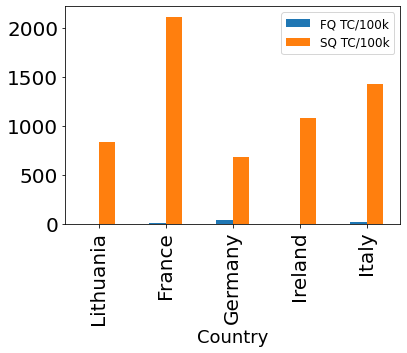

In [35]:
lockdown_relevant = lockdowns[["Country", "FQ TC/100k", "FQ TD/100k", "SQ TC/100k", "SQ TD/100k"]]
lockdown_relevant = lockdown_relevant.set_index("Country")
lockdown_relevant[["FQ TC/100k","SQ TC/100k"]].plot(kind= "bar")

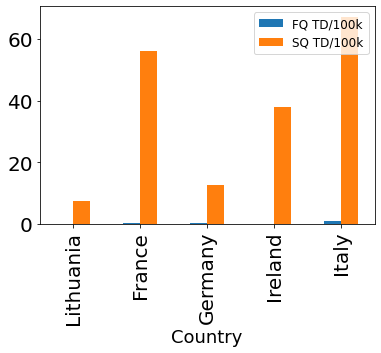

In [36]:
lockdown_relevant[["FQ TD/100k","SQ TD/100k"]].plot(kind= "bar")

#### Results
1. First quarantine was on time and it fullfilled the most important goal to prevent disease from spreading.
2. The second quarantine was two months after the cases grew to the level of the first quarantine.
3. However, other European countries announced quarantine even having more cases and deaths (per capita) and they did not acquired such a huge numbers as Lithuania.
4. There might be different reasons for the actual quarantine exponential growth: too liberal restrictions, collective unconsciousness. Most likely, they will lead to social behaviour.
5. We can reject the hypothesis that the second quarantine was announced to late.